<a href="https://colab.research.google.com/github/nnc1230/nnc1230.github.io/blob/master/HRSA_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Health Resources and Services Administration (HRSA) Cost Prediction**


---
**Dataset:**
The data has 29 attributes:


*   **Minority**: % Rachial and/or Ethnic Minority Patients
*   **Hispanic/Latino**: % Hispanic/Latino Patients
*   **200Poverty**: % Patients at or Below 200% of Federal Poverty Guideline
*   **100Poverty**: % Patients at or Below 100% of Federal Poverty Guideline (included in above)
*   **Uninsured**: % None/Uninsured Patients
*   **Medicaid/CHIP**: % Medicaid/CHIP Patients (Medicaid, Medicaid CHIP, and Other Public Insurance CHIP)
*   **Medicare**: % Medicare Patients
*   **Third-Party**: % Other Third-Party Patients
*   **Homeless**: % Homeless Patients
*   **Veterans**: % Veterans Patients
*   **Medical**: % Patients Receiving Medical Services
*   **Dental**: % Patients Receiving Dental Services
*   **EnablingServices**: % Patients Receiving Enabling Services
*   **Hypertension**: % Hypertensive adults
*   **Diabetes**: % Diabetic adults
*   **Asthma**: % Asthma patients
*   **HIV**: % Symptomatic/Asymptomatic human immunodeficiency virus (HIV) Patients
*   **PrenatalCare**: % Early Entry into Prenatal Care (first visit in first trimester)
*   **LowBirthWeight**: % Low and Very Low Birth Weight
*   **CervicalCancerScreening**: % Eligible patients receiving Cervical Cancer Screening
*   **AdultWeightScreening**: % Adult Medical Patients Age 18 and Older with Body Mass Index (BMI) Screening and Follow-Up
*   **TobaccoScreening**: % Adult Medical Patients Age 18 and Older Screened for Tobacco Use and Received Cessation Counseling
*   **ColorectalCancerScreening**: % Eligible patients Screened for Colorectal Cancer 
*   **DepressionScreening**: % Patients Screened for Clinical Depression and if Positive had a Follow-Up Plan Documented
*   **AsthmaMedications**: % Persistent Asthmatic Patients Treated with Appropriate Pharmacological Intervention
*   **AspirinIVD**: % Patients Age 18 and Older Diagnosed with Ischemic Vascular Disease (IVD): Use of Aspirin or Another Antithrombotic
*   **ControllingHighBP**: % Patients with Hypertension (HTN) Whose Blood Pressure (BP) was Controlled (< 140/90 mmHg)
*   **UncontrolledDiabetes**: % Diabetic Patients with Poorly Controlled Hemoglobin A1c (HbA1c > 9%) or No Test During Year
*   **target**: Annual Cost Per Patient





























**Import Libraries**

In [41]:
import pandas as pd             # data manipulation library
import io                       # helps with input/output of csv files
import matplotlib.pyplot as plt # a library to plot nice graphs
plt.style.use('ggplot') 
import seaborn as sns           # plot style and color on next line
sns.set(style="white", palette="muted", color_codes=True) 
import numpy as np              # Fast array operations    
import pickle

In [42]:
# Algorithms and evaluation metrics
from sklearn.preprocessing import LabelEncoder             #Changes categorical text data to numeric
from sklearn.preprocessing import StandardScaler           #Standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split       #Split arrays or matrices into random train and test subsets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression          #Fit a linear model to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score                       #regression score function
from sklearn.metrics import mean_squared_error as MSE            #Mean squared error regression loss (MSE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor         #A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor             # Import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

# Set random seed for reproducablity
SEED = 1

**1. Data Preparation and Data Exploration**

In [43]:
# Read data in the excel file
data = pd.read_excel('health_center_percent_2017&2018.xlsx',na_values = '-')
data.head(10)

,Minority,Hispanic/Latino,200Poverty,100Poverty,Uninsured,Medicaid/CHIP,Medicare,Third-Party,Homeless,Veterans,Medical,Dental,Mental,EnablingServices,Hypertension,Diabetes,Asthma,HIV,PrenatalCare,LowBirthWeight,CervicalCancerScreening,AdultWeightScreening,TobaccoScreening,ColorectalCancerScreening,DepressionScreening,AsthmaMedications,AspirinIVD,ControllingHighBP,UncontrolledDiabetes,target
0,0.7613,0.2048,0.8732,0.6565,0.6518,0.1998,0.0397,0.1087,0.2154,0.0078,0.8279,0.1821,0.0000,0.0198,0.3183,0.1524,0.0313,0.0006,0.5000,0.2000,0.2871,0.5286,0.9000,0.1159,0.3487,0.7451,0.3726,0.4451,0.4326,733.71
1,0.4065,0.0321,0.9347,0.7816,0.4153,0.3696,0.0990,0.1160,0.0779,0.0148,0.9702,0.0000,0.0961,0.1699,0.4097,0.1604,0.0575,0.0002,0.7778,0.0704,0.3904,0.4864,0.2273,0.2199,0.5023,0.9565,0.6742,0.5870,0.3134,633.40
2,0.3687,0.0326,0.9165,0.6627,0.1772,0.3284,0.1765,0.3179,0.0029,0.0121,0.9984,0.1274,0.0228,0.1164,0.3223,0.1551,0.0606,0.0007,0.6212,0.1221,0.5968,0.8720,0.9967,0.5075,0.9766,0.9187,0.9237,0.7122,0.2626,1105.41
3,0.7117,0.2449,0.9407,0.7055,0.4493,0.3447,0.0822,0.1238,0.1240,0.0109,0.8950,0.2267,0.0032,0.0493,0.2451,0.1683,0.0674,0.0011,0.8333,0.1000,0.4385,0.6703,0.8935,0.2391,0.6939,0.7835,0.8523,0.5293,0.3245,568.09
4,0.7014,0.0438,0.9857,0.7993,0.6061,0.2154,0.0745,0.1039,0.0575,0.0034,0.7222,0.2786,0.0014,0.3544,0.4119,0.1953,0.0441,0.0115,0.6278,0.0833,0.2398,0.6662,0.8552,0.0931,0.8418,0.9612,0.7686,0.4932,0.4653,744.55
5,0.6776,0.0744,0.9888,0.9148,0.4455,0.4040,0.0302,0.1203,0.1452,0.0083,1.0000,0.1795,0.0272,0.1242,0.1655,0.0908,0.0250,0.0262,0.6338,0.0447,0.5161,0.8200,0.8210,0.2168,0.4186,0.7722,0.6000,0.4511,0.3949,433.54
6,0.0681,0.0362,0.9904,0.8064,0.3224,0.1812,0.1537,0.3427,0.0007,0.0001,1.0000,0.0573,0.0000,0.0000,0.3498,0.1631,0.0151,0.0001,0.9688,0.0769,0.5520,0.7527,0.9104,0.3266,0.8677,0.9667,0.8542,0.5129,0.2833,432.13
7,0.4881,0.1838,0.9668,0.8660,0.7078,0.1615,0.0467,0.0840,0.0218,0.0095,0.9331,0.3055,0.0392,0.0826,0.2132,0.1072,0.0346,0.0004,1.0000,0.0667,0.4400,0.7400,0.7200,0.2099,0.5985,0.9087,0.8294,0.7108,0.2502,473.36
8,0.6811,0.0814,0.9838,0.8432,0.4879,0.2550,0.1151,0.1420,0.0854,0.0187,0.8205,0.2447,0.0432,0.0562,0.4553,0.1869,0.0492,0.0169,0.2834,0.0575,0.2353,0.7069,0.6515,0.1157,0.4923,0.9094,0.8124,0.4550,0.3715,686.04
9,0.5639,0.1328,0.9283,0.6528,0.2248,0.4045,0.1768,0.1938,0.0471,0.0186,0.8822,0.2709,0.1156,0.0479,0.3384,0.1885,0.0322,0.0113,0.7054,0.1040,0.4506,0.3045,0.7792,0.2660,0.3571,0.8333,0.6472,0.5618,0.2571,1395.37


In [44]:
data.shape

(1987, 30)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Minority                   1987 non-null   float64
 1   Hispanic/Latino            1987 non-null   float64
 2   200Poverty                 1987 non-null   float64
 3   100Poverty                 1987 non-null   float64
 4   Uninsured                  1987 non-null   float64
 5   Medicaid/CHIP              1987 non-null   float64
 6   Medicare                   1987 non-null   float64
 7   Third-Party                1987 non-null   float64
 8   Homeless                   1987 non-null   float64
 9   Veterans                   1987 non-null   float64
 10  Medical                    1987 non-null   float64
 11  Dental                     1987 non-null   float64
 12  Mental                     1987 non-null   float64
 13  EnablingServices           1987 non-null   float

In [46]:
data.describe()

,Minority,Hispanic/Latino,200Poverty,100Poverty,Uninsured,Medicaid/CHIP,Medicare,Third-Party,Homeless,Veterans,Medical,Dental,Mental,EnablingServices,Hypertension,Diabetes,Asthma,HIV,PrenatalCare,LowBirthWeight,CervicalCancerScreening,AdultWeightScreening,TobaccoScreening,ColorectalCancerScreening,DepressionScreening,AsthmaMedications,AspirinIVD,ControllingHighBP,UncontrolledDiabetes,target
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,0.581891,0.294081,0.900574,0.654217,0.244671,0.449221,0.106561,0.199547,0.061949,0.017092,0.829998,0.228177,0.087339,0.104240,0.284741,0.153188,0.054912,0.008839,0.763669,0.096586,0.528835,0.659543,0.864932,0.409864,0.674323,0.858461,0.795316,0.628222,0.331221,1047.032315
std,0.308732,0.282399,0.113899,0.182941,0.170049,0.184119,0.068461,0.123460,0.152355,0.019642,0.148843,0.167597,0.100296,0.164037,0.095786,0.054138,0.027179,0.034658,0.155743,0.118071,0.162149,0.212229,0.128424,0.169377,0.215767,0.129835,0.130168,0.097289,0.106268,718.376333
min,0.007200,0.000000,0.081400,0.008200,0.006600,0.000000,0.000000,0.000000,0.000000,0.000000,0.185600,0.000000,0.000000,0.000000,0.036300,0.017200,0.003600,0.000000,0.087000,0.000000,0.007200,0.000000,0.014100,0.000000,0.000000,0.042400,0.000000,0.123400,0.025300,27.640000
25%,0.318050,0.049450,0.869800,0.540050,0.119400,0.299050,0.055200,0.109050,0.003200,0.004200,0.758900,0.100050,0.029650,0.004200,0.219000,0.120800,0.037250,0.000400,0.677300,0.045850,0.423900,0.500000,0.820800,0.290600,0.541000,0.814300,0.742200,0.566850,0.264900,702.515000
50%,0.650900,0.193300,0.942600,0.676100,0.201800,0.464700,0.091100,0.177300,0.015400,0.010600,0.863200,0.209800,0.062100,0.044100,0.276200,0.150200,0.050800,0.001200,0.781100,0.076900,0.542900,0.673800,0.900000,0.405800,0.712000,0.889300,0.819800,0.631000,0.319800,890.270000
75%,0.854450,0.489300,0.972600,0.786700,0.327500,0.599500,0.141550,0.278400,0.052850,0.023750,0.940750,0.335550,0.108450,0.123850,0.344900,0.177600,0.067350,0.004800,0.871000,0.111100,0.641700,0.835650,0.950500,0.527100,0.842800,0.945000,0.879800,0.690450,0.382200,1164.720000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.930100,0.451000,0.798900,1.000000,0.248000,1.000000,0.886700,0.928000,1.000000,1.009900,0.946000,0.357400,0.488500,1.000000,1.000000,1.000000,1.000000,1.000000,0.977400,1.000000,1.000000,1.000000,0.971400,0.953500,9942.600000


In [47]:
#Check null values
data.isnull().sum()

Minority                     0
Hispanic/Latino              0
200Poverty                   0
100Poverty                   0
Uninsured                    0
Medicaid/CHIP                0
Medicare                     0
Third-Party                  0
Homeless                     0
Veterans                     0
Medical                      0
Dental                       0
Mental                       0
EnablingServices             0
Hypertension                 0
Diabetes                     0
Asthma                       0
HIV                          0
PrenatalCare                 0
LowBirthWeight               0
CervicalCancerScreening      0
AdultWeightScreening         0
TobaccoScreening             0
ColorectalCancerScreening    0
DepressionScreening          0
AsthmaMedications            0
AspirinIVD                   0
ControllingHighBP            0
UncontrolledDiabetes         0
target                       0
dtype: int64

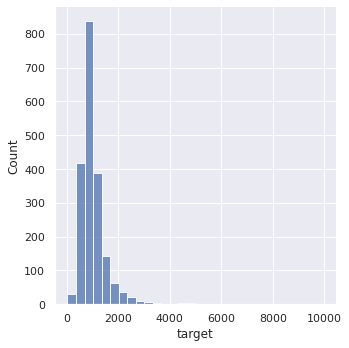

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(data['target'], bins=30)
plt.show()

We see that the values of Cost per patient (target) are distributed normallly without outliers.

**Attributes Correlation**

In [49]:
data.corr(method='pearson')

,Minority,Hispanic/Latino,200Poverty,100Poverty,Uninsured,Medicaid/CHIP,Medicare,Third-Party,Homeless,Veterans,Medical,Dental,Mental,EnablingServices,Hypertension,Diabetes,Asthma,HIV,PrenatalCare,LowBirthWeight,CervicalCancerScreening,AdultWeightScreening,TobaccoScreening,ColorectalCancerScreening,DepressionScreening,AsthmaMedications,AspirinIVD,ControllingHighBP,UncontrolledDiabetes,target
Minority,1.000000,0.598052,0.433568,0.499053,0.281032,0.316600,-0.577799,-0.538858,0.083045,-0.518434,0.082090,-0.030351,-0.039441,0.143215,-0.223763,0.159853,0.194279,0.115867,-0.284217,-0.033400,0.189568,0.062279,-0.040139,-0.082395,0.018561,0.077842,-0.040586,-0.187107,0.276612,0.060744
Hispanic/Latino,0.598052,1.000000,0.286405,0.253949,0.251613,0.204494,-0.418310,-0.419569,-0.003312,-0.366283,0.106889,-0.038181,-0.042668,0.117429,-0.335426,0.113257,0.012794,0.005716,-0.069112,-0.117964,0.272855,0.123615,0.137354,0.081387,0.071603,0.081789,0.028727,0.109589,0.111742,-0.039621
200Poverty,0.433568,0.286405,1.000000,0.741964,0.253194,0.260440,-0.380433,-0.526171,0.142372,-0.372728,-0.021125,-0.010550,0.050450,0.103177,-0.061165,0.180962,0.033612,-0.011939,-0.201611,0.024859,-0.008130,0.121611,-0.046605,-0.153171,0.042026,-0.012354,-0.048307,-0.113270,0.224745,-0.122154
100Poverty,0.499053,0.253949,0.741964,1.000000,0.233292,0.299874,-0.385925,-0.554552,0.266491,-0.401719,-0.018446,-0.101459,0.087883,0.145288,-0.061675,0.160830,0.119248,0.043046,-0.234590,0.046704,0.006569,0.157545,-0.043370,-0.154303,0.046427,-0.020488,-0.052395,-0.147394,0.264274,-0.068735
Uninsured,0.281032,0.251613,0.253194,0.233292,1.000000,-0.547789,-0.419276,-0.327932,0.109119,-0.199705,-0.065182,0.018008,-0.101674,0.178011,-0.107472,0.143369,-0.333931,0.057301,-0.287495,-0.039298,-0.043292,0.082944,-0.079592,-0.231315,0.094443,-0.000742,-0.030134,-0.163998,0.230026,-0.140627
Medicaid/CHIP,0.316600,0.204494,0.260440,0.299874,-0.547789,1.000000,-0.325170,-0.556519,0.120376,-0.276094,-0.110867,0.155183,0.155138,-0.008330,-0.186070,-0.037264,0.369215,-0.012280,-0.007493,-0.007497,0.151715,0.036377,0.084887,0.061681,-0.006223,0.073846,0.023436,0.057603,0.027541,0.093591
Medicare,-0.577799,-0.418310,-0.380433,-0.385925,-0.419276,-0.325170,1.000000,0.507910,-0.069203,0.515292,0.155935,-0.200449,0.058151,-0.095460,0.437029,0.028070,0.035088,-0.031499,0.292825,0.089252,-0.147559,-0.077789,0.007413,0.152777,-0.113506,-0.098383,0.000712,0.107662,-0.260284,0.084335
Third-Party,-0.538858,-0.419569,-0.526171,-0.554552,-0.327932,-0.556519,0.507910,1.000000,-0.291449,0.401082,0.168653,-0.145080,-0.123570,-0.179821,0.183169,-0.157471,-0.110151,-0.043136,0.244810,0.015824,-0.084804,-0.125362,-0.021082,0.141904,-0.057867,-0.054547,0.006155,0.080285,-0.213567,0.007354
Homeless,0.083045,-0.003312,0.142372,0.266491,0.109119,0.120376,-0.069203,-0.291449,1.000000,0.032710,-0.068290,-0.085381,0.285964,0.214101,-0.111409,-0.080814,0.069910,0.084216,-0.135789,0.067108,-0.121088,-0.050025,-0.036168,-0.126563,-0.079466,-0.024283,0.029328,-0.112334,0.113829,0.205339
Veterans,-0.518434,-0.366283,-0.372728,-0.401719,-0.199705,-0.276094,0.515292,0.401082,0.032710,1.000000,-0.052484,0.075386,0.049362,-0.072616,0.163583,-0.110647,-0.048509,-0.054850,0.201723,0.063821,-0.135289,-0.115852,-0.018003,0.086360,-0.049301,-0.016631,0.030777,0.081790,-0.190762,0.154495


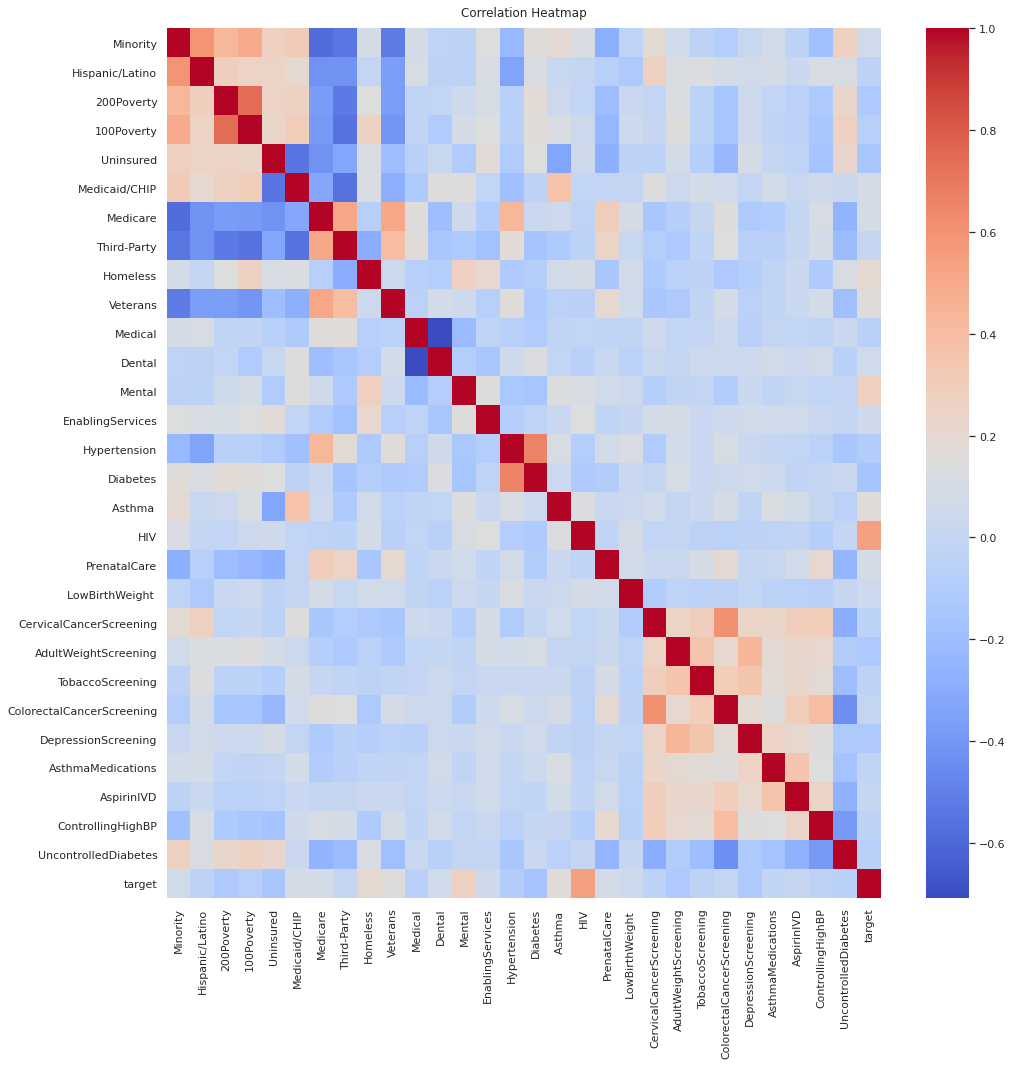

In [50]:
# Correlation Map
plt.figure(figsize=(16, 16))
data_corr = data.corr()
# chart = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True, xticklabels=True,yticklabels=True,cmap='coolwarm');
chart = sns.heatmap(data_corr, xticklabels=True,yticklabels=True,cmap='coolwarm');
chart.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


**Note:**
From the above correlation table and plot, the rate of HIV patients (HIV) is correlated with the cost per patient (target) directly. 
Other than that, there is a positive relation between the following attributes:


*   Rate of Hispanic/Latino Patients (Hispanic/Latino) and Rate of Minority Patients (Minority)
*   Rate of Patients at or Below 200% of Federal Poverty Guideline (200Poverity) and Rate of Patients at or Below 100% of Federal Poverty Guideline (100Poverty)
*   Rate of Medicare Patients (Medicare) and Rate of Third-Party Patients (Third-Party)
*   Rate of Veteran Patients (Veterans) and Rate of Medicare Patients (Medicare)
*   Rate of Hypertensive Patients (Hypertension) and Rate of Diabetic Patients (Diabetes)
*   Rate of Colorectal Cancer Screening Patients (ColorectalCancerScreening) and Rate of Cervical Cancer Screening Patients (CervicalCancerScreening)

We can also see there is an inverse proportion between the following attributes:


*   Rate of Medicare Patients (Medicare) and Rate of Minority Patients (Minority)
*   Rate of Third-Party Patients (Third-Party) and Rate of Minority Patients (Minority)
*   Rate of Veterans Patients (Veterans) and Rate of Minority Patients (Minority)
*   Rate of Third-Party Patients (Third-Party) and Rate of Patients at or Below 200% of Federal Poverty Guideline (200Poverity)
*   Rate of Third-Party Patients (Third-Party) and Rate of Patients at or Below 100% of Federal Poverty Guideline (100Poverity)
*   Rate of Third-Party Patients (Third-Party) and Rate of Medicaid/CHIP Patients (Medicaid, Medicaid CHIP, and Other Public Insurance CHIP) (Medicaid/CHIP)
*   Rate of Patients Receiving Medical Services (Medical) and Rate of Patients Receiving Dental Services (Dental)


In [51]:
data.corr()['target'].sort_values()

Diabetes                    -0.159840
Uninsured                   -0.140627
AdultWeightScreening        -0.123494
200Poverty                  -0.122154
DepressionScreening         -0.118779
Hypertension                -0.091756
100Poverty                  -0.068735
UncontrolledDiabetes        -0.063436
Medical                     -0.060783
CervicalCancerScreening     -0.045449
Hispanic/Latino             -0.039621
ControllingHighBP           -0.039471
TobaccoScreening            -0.036681
AsthmaMedications           -0.020419
ColorectalCancerScreening   -0.001933
AspirinIVD                   0.006954
Third-Party                  0.007354
LowBirthWeight               0.051564
EnablingServices             0.057885
Minority                     0.060744
Dental                       0.060811
PrenatalCare                 0.082690
Medicare                     0.084335
Medicaid/CHIP                0.093591
Veterans                     0.154495
Asthma                       0.170377
Homeless    

In [52]:
# Choose Features and Target
x = data.drop(["target"], axis=1)
y = data["target"]

In [53]:
# Split the data 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = SEED)


Linear: -303288.76, 204943.107
Lasso: -306541.294, 219480.477
ElasticNet: -559044.482, 419177.229
KNN: -404735.126, 282139.117
DecisionTree: -536152.449, 330453.397
SVR: -593587.8, 439072.556
AdaBoost: -369933.666, 183433.764
GradientBoost: -276871.523, 191342.101
RandomForest: -276843.273, 213365.718
ExtraTrees: -228323.87, 182792.27


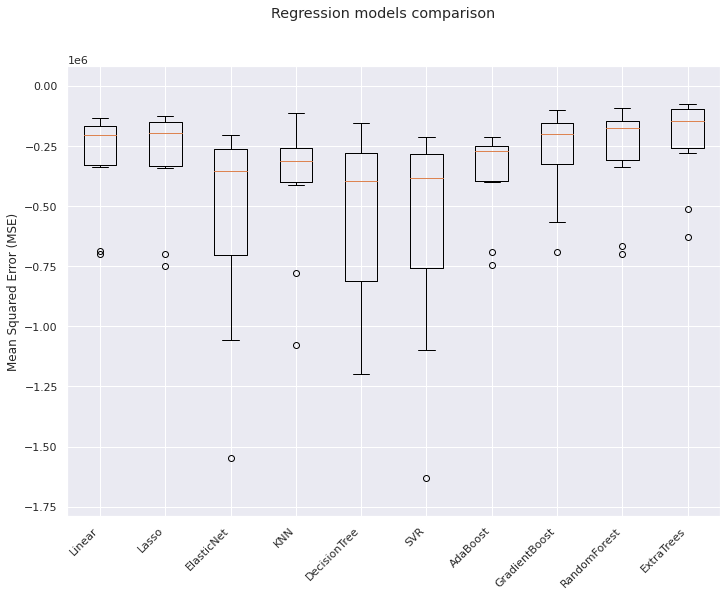

In [60]:
# different regression models
# user variables to tune
folds = 10
metric = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()


# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
	model   = models[model_name]
	k_fold  = KFold(n_splits=folds)
	results = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=metric)
	
	model_results.append(results)
	model_names.append(model_name)
	print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.savefig("model_mse_scores.png"); plt.show()

Based on the above comparison, we observe that Extra Tree model outperforms the other models. So we will choose it as the best regression model for this problem.

In [67]:
# create and fit the best regression model
best_model = ExtraTreesRegressor(random_state=SEED)
best_model.fit(x_train, y_train)

# make predictions using the model
predictions = best_model.predict(x_test)
print("RMSE : {}".format((MSE(y_test, predictions)**(1/2))))


RMSE : 409.0466290992062


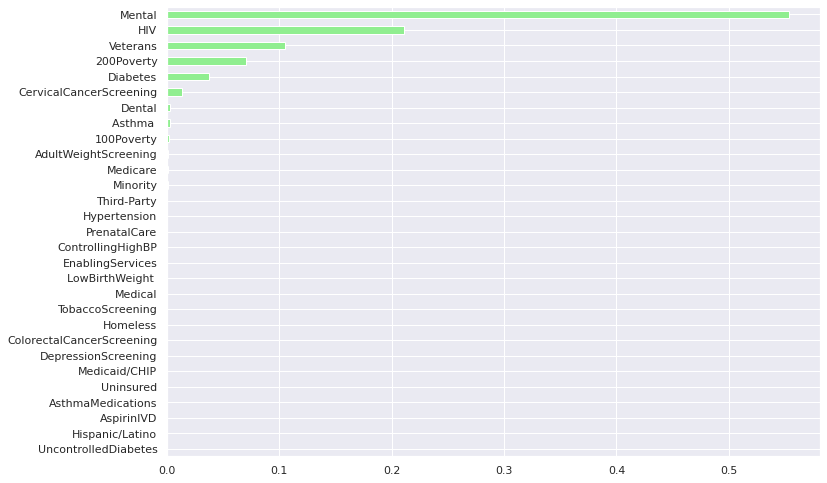

UncontrolledDiabetes         0.000000
Hispanic/Latino              0.000000
AspirinIVD                   0.000000
AsthmaMedications            0.000000
Uninsured                    0.000000
Medicaid/CHIP                0.000000
DepressionScreening          0.000000
ColorectalCancerScreening    0.000000
Homeless                     0.000000
TobaccoScreening             0.000000
Medical                      0.000000
LowBirthWeight               0.000000
EnablingServices             0.000000
ControllingHighBP            0.000000
PrenatalCare                 0.000254
Hypertension                 0.000271
Third-Party                  0.000318
Minority                     0.000691
Medicare                     0.000999
AdultWeightScreening         0.001067
100Poverty                   0.001563
Asthma                       0.002399
Dental                       0.002600
CervicalCancerScreening      0.013132
Diabetes                     0.037802
200Poverty                   0.070504
Veterans    

In [64]:
# Feature importance 

# Create a pd.Serise of features importances
importances_rf = pd.Series(rf.feature_importances_, index=x.columns) #data=rf.feature_importances_, index=X_train.columns

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen'); plt.show()

# print sorted importances_rf
print(sorted_importances_rf)

We observe that the most important features (2017&2018) include Mental(55.32%), HIV(21.04%), Veterans (10.47%), 200Poverty(7.05%)

We will try and discard features with importance coefficient less than 0.01 and use it to model our Random Forest again to see if there is an improvement in our prediction results.

In [68]:
# Redo with correlated features > 0.01: HIV, Mental, Veterans, 200Poverty, CervicalCancerScreening
x1 = data[['HIV', 'Mental', '200Poverty', 'CervicalCancerScreening','Veterans']]
y1 = data["target"]

# Split the data (2nd round)
x1_train,x1_test,y1_train,y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = SEED)

# create and fit the best regression model
best_model1 = ExtraTreesRegressor(random_state=SEED)
best_model1.fit(x1_train, y1_train)

# make predictions using the model
predictions1 = best_model1.predict(x1_test)
print("RMSE : {}".format((MSE(y1_test, predictions1)**(1/2))))

RMSE : 471.12107418199787


Notice that the RMSE did not improve after removing lowly correlated features.

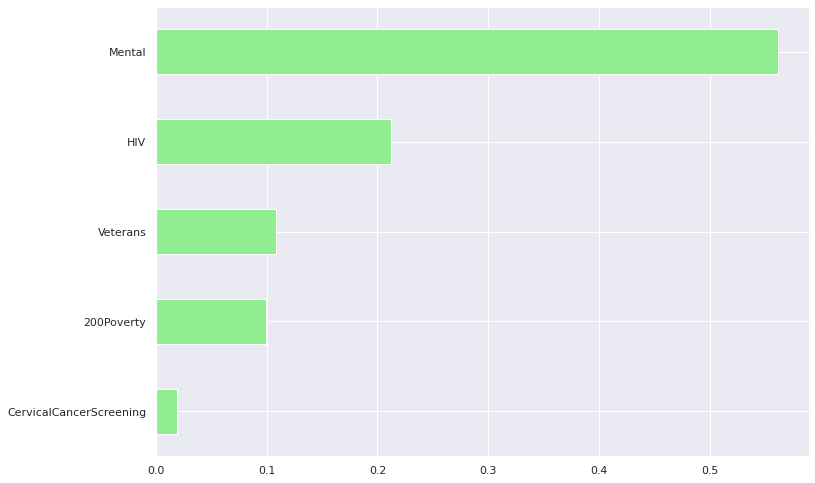

CervicalCancerScreening    0.018901
200Poverty                 0.099151
Veterans                   0.108899
HIV                        0.211925
Mental                     0.561123
dtype: float64


In [66]:
# Redo Feature Importance with highly correlated features
importances_rf1 = pd.Series(rf1.feature_importances_, index=x1.columns) #data=rf.feature_importances_, index=X_train.columns

# Sort importances_rf
sorted_importances_rf1 = importances_rf1.sort_values()

# Make a horizontal bar plot
sorted_importances_rf1.plot(kind='barh', color='lightgreen'); plt.show()

# print sorted importances_rf
print(sorted_importances_rf1)

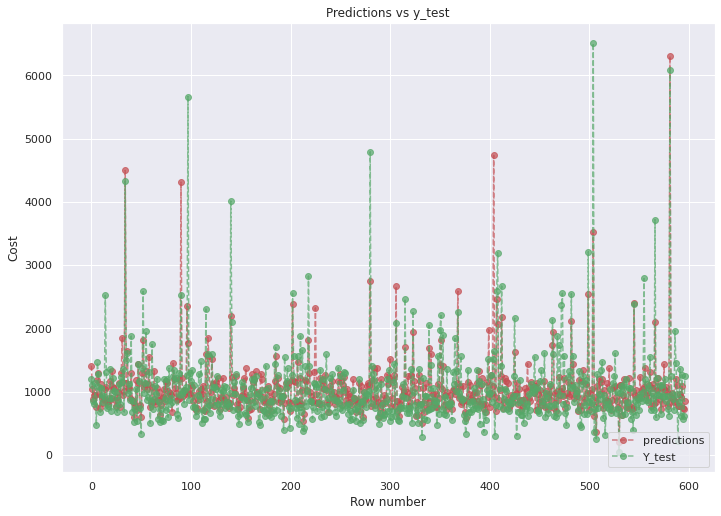

In [69]:
# plot between predictions and Y_test
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('Cost')
plt.title('Predictions vs y_test')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# save the model to disk
import pickle
filename = 'model.pkl'
pickle.dump(sgbt, open(filename, 'wb'))